# Programming Exercise 5:
## Regularized Linear Regression and Bias v.s. Variance

#### Setup

In [2]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import fmin_cg, minimize
import matplotlib.pyplot as plt
from IPython.display import Image

data = loadmat('ex5data1.mat')
X, Xtest, Xval, y, ytest, yval = data['X'], data['Xtest'], data['Xval'], data['y'], data['ytest'], data['yval']
m = X.shape[0]

### 1. Regularized Linear Regression

#### 1.1 Visualizing the dataset

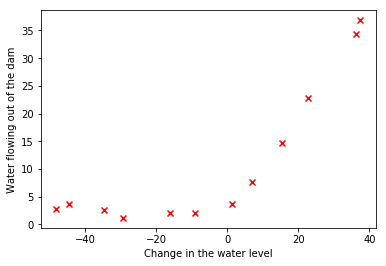

In [3]:
plt.scatter(X, y, color='r', marker='x')
plt.xlabel('Change in the water level')
plt.ylabel('Water flowing out of the dam')
plt.show()

#### 1.2/1.3 Regularized linear regression cost function and Gradients
The cost function will be defined together as the gradient.

In [102]:
def linreg_cost_fun(theta, X, y, lam):
    theta = theta.reshape(-1,1).T
    X = np.c_[np.ones((X.shape[0], 1)), X]
    m = y.shape[0]
    J = 0
    
    regf = lam / (2 * m) * np.sum(np.power(theta[:,1:],2))
    J = 1 / (2 * m) * np.sum(np.power((X.dot(theta.T) - y),2)) + regf
    
    return J
    

In [109]:
def linreg_grad_calc(theta, X, y, lam):
    theta = theta.reshape(-1,1).T
    print('input size', theta.shape)
    X = np.c_[np.ones((X.shape[0], 1)), X]
    m = y.shape[0]
    grad = np.zeros((y.shape))
    
    theta_map = np.ones((theta.shape))
    theta_map[:,0] = 0
    print('First eq size', (1 / m * ((X.dot(theta.T) - y).T.dot(X))).shape)
    print('Reg fun size', (lam / m * (np.multiply(theta, theta_map))).shape)
    grad = 1 / m * ((X.dot(theta.T) - y).T.dot(X)) + lam / m * (np.multiply(theta, theta_map))
    
    return grad

In [110]:
theta = np.ones(2)
J, grad = linreg_cost_fun(theta, X, y, 1), linreg_grad_calc(theta, X, y, 1)
J, grad

input size (1, 2)
First eq size (1, 2)
Reg fun size (1, 2)


(303.99319222026429, array([[ -15.30301567,  598.25074417]]))

We should expect a cost of *J=303.993* and Gradients of *[-15.30, 598.250]*

#### 1.4 Fitting linear regression

In [113]:
def train_linreg(X, y, lam):
    initial_theta = np.zeros((X.shape[1]+1, 1)).T
    calc_thetas = fmin_cg(linreg_cost_fun, initial_theta, fprime=linreg_grad_calc, args=(X, y, lam), maxiter = 200)
#     calc_thetas = minimize(linreg_cost_fun, initial_theta, args = (X, y, lam), method=None, jac=linreg_grad_calc, options={'maxiter':200})
    return calc_thetas

In [114]:
cal_thetas = train_linreg(X, y, 0)

input size (1, 2)
First eq size (1, 2)
Reg fun size (1, 2)


ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)